<a href="https://colab.research.google.com/github/sainahah/customer-segmentation/blob/main/Customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data Loading and Exploration**

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
       CustomerID         Age  Annual Income (k$)  

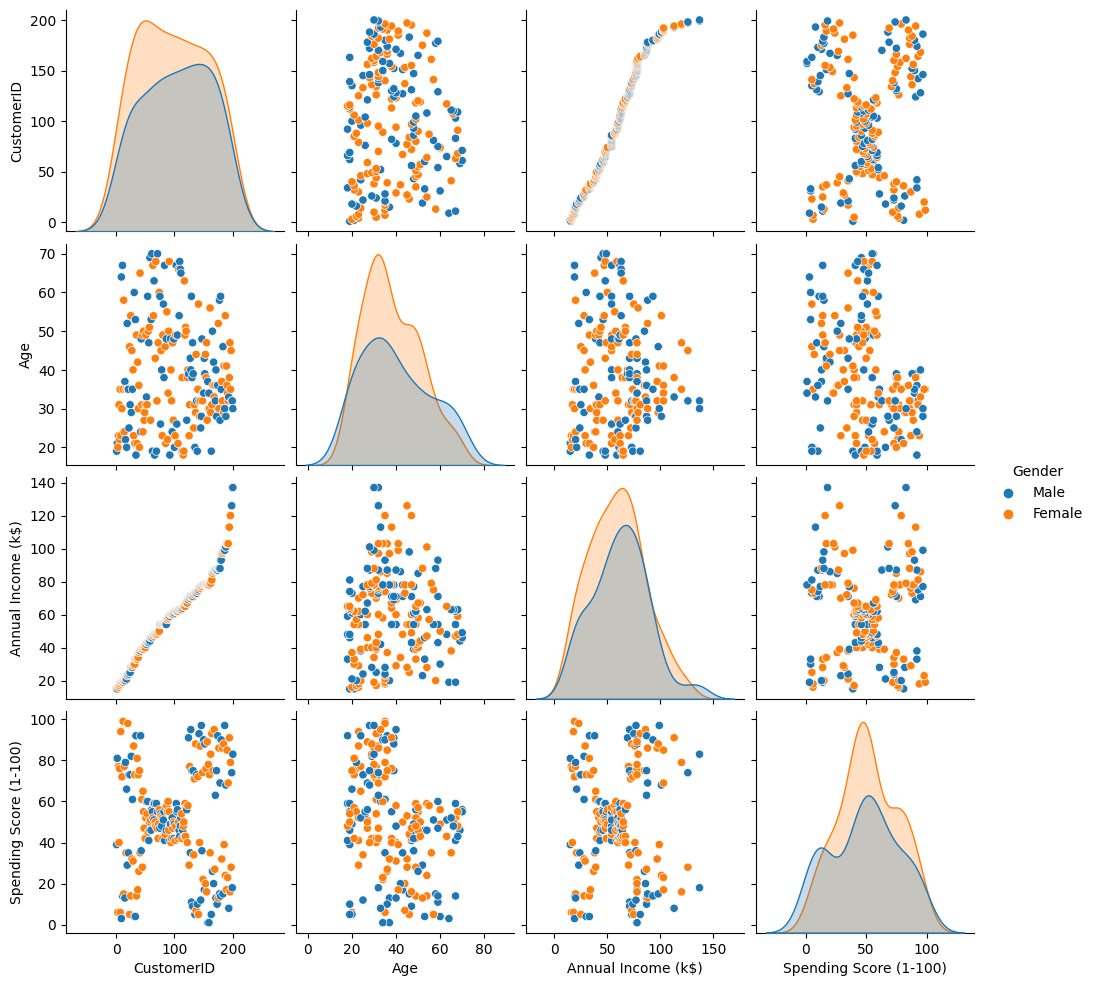

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("/content/Mall_Customers.csv")

# Explore basic statistics and characteristics of the data
print(data.head())
print(data.info())
print(data.describe())

# Visualize the data distribution and relationships using plots
sns.pairplot(data, hue='Gender', diag_kind='kde')
plt.show()


**Data Preprocessing**

In [2]:
from sklearn.preprocessing import StandardScaler


data_encoded = pd.get_dummies(data, columns=['Gender'], drop_first=True)

# Scale numerical features
# We'll scale the 'Age', 'Annual Income', and 'Spending Score' columns
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data_encoded[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
data_encoded[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']] = scaled_features

# Display the preprocessed data
print(data_encoded.head())


   CustomerID       Age  Annual Income (k$)  Spending Score (1-100)  \
0           1 -1.424569           -1.738999               -0.434801   
1           2 -1.281035           -1.738999                1.195704   
2           3 -1.352802           -1.700830               -1.715913   
3           4 -1.137502           -1.700830                1.040418   
4           5 -0.563369           -1.662660               -0.395980   

   Gender_Male  
0            1  
1            1  
2            0  
3            0  
4            0  


**Customer Segmentation (Clustering)**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

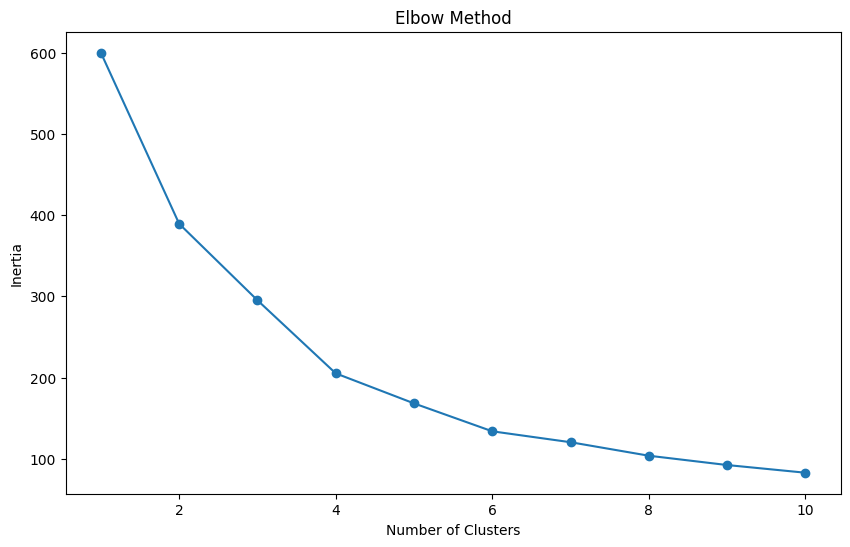

   CustomerID       Age  Annual Income (k$)  Spending Score (1-100)  \
0           1 -1.424569           -1.738999               -0.434801   
1           2 -1.281035           -1.738999                1.195704   
2           3 -1.352802           -1.700830               -1.715913   
3           4 -1.137502           -1.700830                1.040418   
4           5 -0.563369           -1.662660               -0.395980   

   Gender_Male  Cluster  
0            1        2  
1            1        2  
2            0        3  
3            0        2  
4            0        2  


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [3]:
from sklearn.cluster import KMeans
import numpy as np

# Convert the preprocessed data to a NumPy array
X = data_encoded[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].values

# Determine the optimal number of clusters using the Elbow Method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

# Based on the elbow method, let's choose 5 clusters
n_clusters = 5

# Apply K-means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
data_encoded['Cluster'] = kmeans.fit_predict(X)

# Display the data with assigned clusters
print(data_encoded.head())


**Visualization of Clusters**

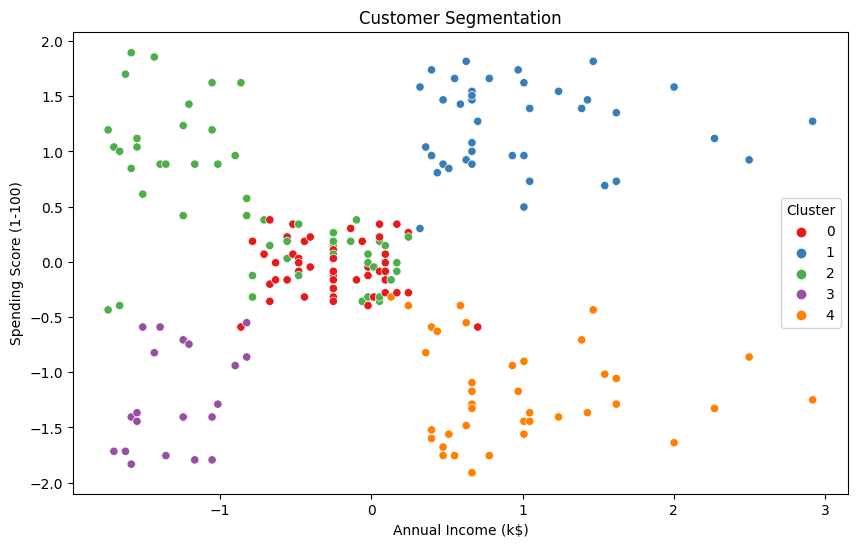

In [4]:
# Visualize the clusters using scatter plots
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_encoded, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='Set1')
plt.title('Customer Segmentation')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()


**Conclusion and Insights**

In [5]:
# Calculate the mean values of each feature for each cluster
cluster_means = data_encoded.groupby('Cluster').mean()

# Display the mean values for each cluster
print(cluster_means)

# Summarize insights for each cluster
for cluster_id in range(n_clusters):
    cluster_data = data_encoded[data_encoded['Cluster'] == cluster_id]
    cluster_size = len(cluster_data)
    print(f"\nCluster {cluster_id} - Size: {cluster_size}")
    print(f"Mean Age: {cluster_data['Age'].mean():.2f}")
    print(f"Mean Annual Income (k$): {cluster_data['Annual Income (k$)'].mean():.2f}")
    print(f"Mean Spending Score (1-100): {cluster_data['Spending Score (1-100)'].mean():.2f}")


         CustomerID       Age  Annual Income (k$)  Spending Score (1-100)  \
Cluster                                                                     
0         83.872340  1.204841           -0.235773               -0.052368   
1        161.025000 -0.428806            0.974847                1.216085   
2         55.648148 -0.980679           -0.743060                0.467440   
3         24.100000  0.531074           -1.290508               -1.236467   
4        159.743590  0.073331            0.974945               -1.197297   

         Gender_Male  
Cluster               
0           0.425532  
1           0.450000  
2           0.407407  
3           0.400000  
4           0.512821  

Cluster 0 - Size: 47
Mean Age: 1.20
Mean Annual Income (k$): -0.24
Mean Spending Score (1-100): -0.05

Cluster 1 - Size: 40
Mean Age: -0.43
Mean Annual Income (k$): 0.97
Mean Spending Score (1-100): 1.22

Cluster 2 - Size: 54
Mean Age: -0.98
Mean Annual Income (k$): -0.74
Mean Spending Score (1-10